In [1]:
# Importing Libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
parquet_file= r'C:\Users\verma\OneDrive\Desktop\PYTHON_DATA_PROJECT\1_Data_science_job_postings_dataset\0000.parquet'
df = pd.read_parquet(parquet_file, engine='auto')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)

In [38]:
df['job_work_from_home'].value_counts().index

Index([False, True], dtype='bool', name='job_work_from_home')

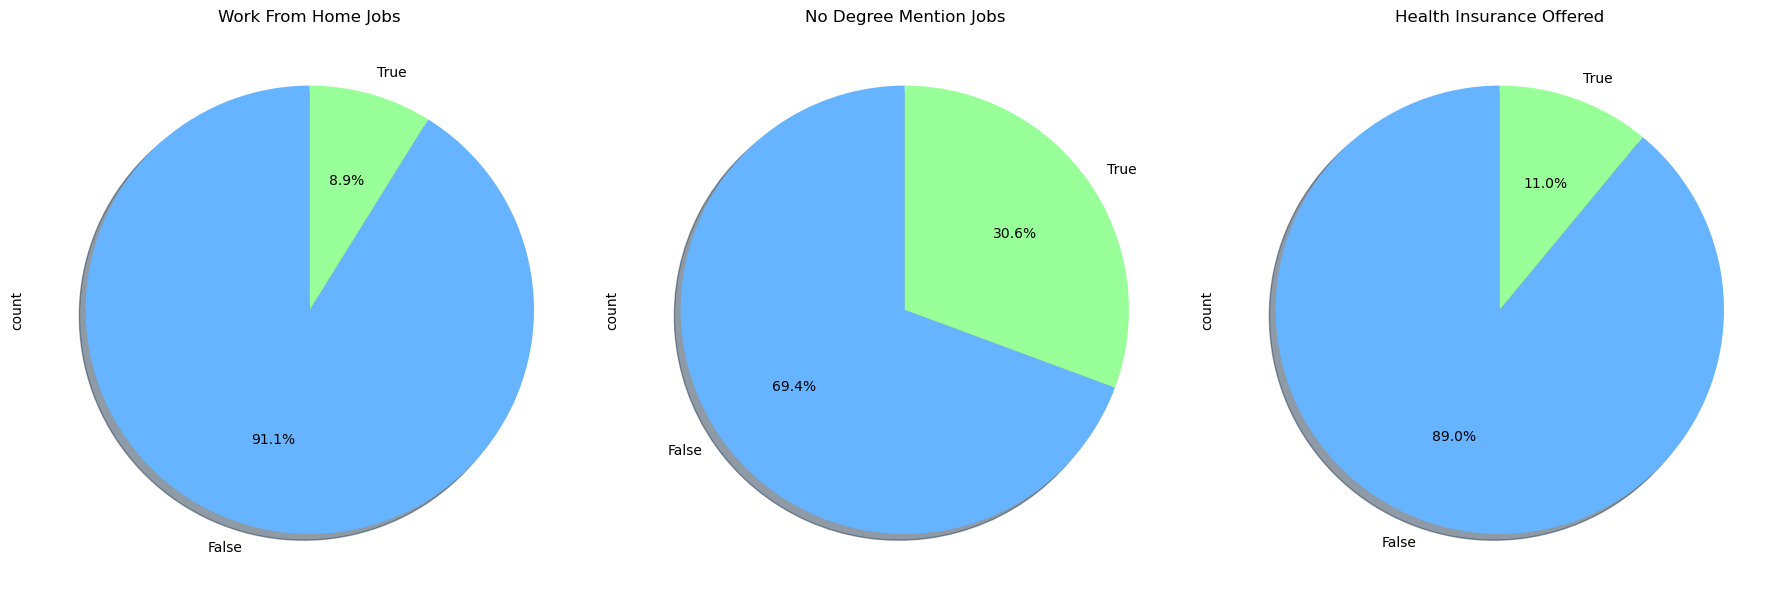

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Define the labels and colors for each pie chart
labels_wfh = df['job_work_from_home'].value_counts().index
labels_degree = df['job_no_degree_mention'].value_counts().index
labels_insurance = df['job_health_insurance'].value_counts().index

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']

# Plot for 'Work From Home Jobs'
df['job_work_from_home'].value_counts().plot(
    kind='pie',
    ax=ax[0],
    labels=[f'{label}' for label in labels_wfh],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True
)
ax[0].set_title('Work From Home Jobs')

# Plot for 'No Degree Mention Jobs'
df['job_no_degree_mention'].value_counts().plot(
    kind='pie',
    ax=ax[1],
    labels=[f'{label}' for label in labels_degree],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True
)
ax[1].set_title('No Degree Mention Jobs')

# Plot for 'Health Insurance Offered'
df['job_health_insurance'].value_counts().plot(
    kind='pie',
    ax=ax[2],
    labels=[f'{label}' for label in labels_insurance],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True
)
ax[2].set_title('Health Insurance Offered')

# Improve layout
fig.tight_layout()

# Display the plot
plt.show()